In [77]:
%run 4.2_AutoDL.ipynb

In [3]:
#Librairies
import joblib
from joblib import dump, load

#Tf & Keras
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomZoom,RandomWidth,Rescaling
from tensorflow.keras.layers import RandomBrightness
from tensorflow.keras.applications import VGG19,EfficientNetB1


## Application de la fonction principale de test_DL

In [81]:
#Choix des différentes variables de notre fonction test_DL

#chemin où sont stockées les images d'entrainement classées 
repertoire_train = get_output_path_folder("images_traitees_classe_train")

#chemin où sont stockées les images de test
repertoire_test = get_output_path_folder("images_traitees_classe_test")  ###Ajout FL pour les prédictions

#chemin où est stocké le dataFrame de suivi
chemin_df_score_DL = get_output_path_file("df_score_DL.joblib")

#Nos variables
image_size = (256,256)
batch_size = 30
epochs = 10
validation_split = 0.2
seed = 123

#DataAugmentation
data_augmentation = keras.Sequential([
   RandomFlip("horizontal",seed=123),     #Inversion horizontale aléatoire des images
   RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15),seed=123), #Zoom aléatoire des images jusqu'à 15%
   RandomWidth(factor=(0.2, 0.3), interpolation='bilinear', seed=123), #ajustement aléatoire de la largeur d'un batch d'images par un facteur aléatoire
   RandomBrightness(factor =(0.1, 0.3), value_range=(0, 255), seed=123),#ajustement aléatoire de la luminosité d'images d'entrée RGB, différents facteurs par images d'un même batch
   RandomRotation(0.2)
])

# voir par exemple : https://www.tensorflow.org/tutorials/images/data_augmentation?hl=fr

#Notre modèle à tester, éventuellement une liste de modèles

# Chargement du modèle pré entrainé efficientNet
base_model = EfficientNetB1(include_top=False, ,weights="imagenet", input_shape=(256,256,3))

for layer in base_model.layers:
    layer.trainable = False    # On gèle les poids du modèles VGG19

#Instanciation dun modèle
model = Sequential()

#data_augmentation) et rescaling
model.add(data_augmentation)
model.add(Rescaling(1./255))

model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(27, activation='softmax'))
liste_modele=[model]

#les variables lors du .compile
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)

#nom fichier contrrôle
fichier_controle = 'modele_EfficientNetB1'

optimizer=adam
loss='categorical_crossentropy'
metrics=['acc']

#lancement de la fonction test_DL
df_score_DL = test_DL_predict(repertoire_train,repertoire_test,image_size,batch_size,validation_split,liste_modele,optimizer,loss,metrics,epochs,chemin_df_score_DL,fichier_controle)

#sauvegarde dans le même répertoire 
dump(df_score_DL,get_output_path_file("df_score_DL.joblib"))

Found 67931 files belonging to 27 classes.
Using 54345 files for training.
Found 67931 files belonging to 27 classes.
Using 13586 files for validation.
Found 16983 files belonging to 27 classes.
récupération du df existant
debut de l'entrainement du modèle 0
Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 3.0256 - acc: 0.1322 
Epoch 1: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1387s 23s/step - loss: 3.0256 - acc: 0.1322 - val_loss: 2.7808 - val_acc: 0.2156 - lr: 0.0010
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 2.7054 - acc: 0.2122 
Epoch 2: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1425s 24s/step - loss: 2.7054 - acc: 0.2122 - val_loss: 2.6187 - val_acc: 0.2467 - lr: 0.0010
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 2.6255 - acc: 0.2361 
Epoch 3: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1315s 22s/step - loss: 2.6255 - acc: 0.2361 - val_loss: 2.5340 - val_acc: 0.2489 - lr: 0.0010
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 2.5381 - acc: 0.2633 
Epoch 4: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1569s 26s/step - loss: 2.5381 - acc: 0.2633 - val_loss: 2.4995 - val_acc: 0.2622 - lr: 0.0010
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 2.4888 - acc: 0.2683  
Epoch 5: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 4543s 77s/step - loss: 2.4888 - acc: 0.2683 - val_loss: 2.5101 - val_acc: 0.2533 - lr: 0.0010
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 2.4012 - acc: 0.2978 
Epoch 6: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1565s 26s/step - loss: 2.4012 - acc: 0.2978 - val_loss: 2.3335 - val_acc: 0.3356 - lr: 0.0010
Epoch 7/10
60/60 [==============================] - ETA: 0s - loss: 2.4088 - acc: 0.2844 
Epoch 7: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1403s 23s/step - loss: 2.4088 - acc: 0.2844 - val_loss: 2.3636 - val_acc: 0.2800 - lr: 0.0010
Epoch 8/10
60/60 [==============================] - ETA: 0s - loss: 2.3527 - acc: 0.3211 Restoring model weights from the end of the best epoch: 6.

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 8: saving model to C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


INFO:tensorflow:Assets written to: C:\Users\xavie\Documents\GitHub\AVR23_CDS_Rakuten\notebooks\Fichiers_points_de_controles\assets


60/60 [==============================] - 1482s 25s/step - loss: 2.3527 - acc: 0.3211 - val_loss: 2.4060 - val_acc: 0.2778 - lr: 0.0010
Epoch 8: early stopping
fin de l'entrainement du modèle 0


['C:\\Users\\xavie\\Documents\\GitHub\\AVR23_CDS_Rakuten\\notebooks\\df_score_DL.joblib']

In [2]:
#import pour vérification des résultats
df_score_DL = load(get_output_path_file("df_score_DL.joblib"))
df_score_DL.head()

NameError: name 'load' is not defined

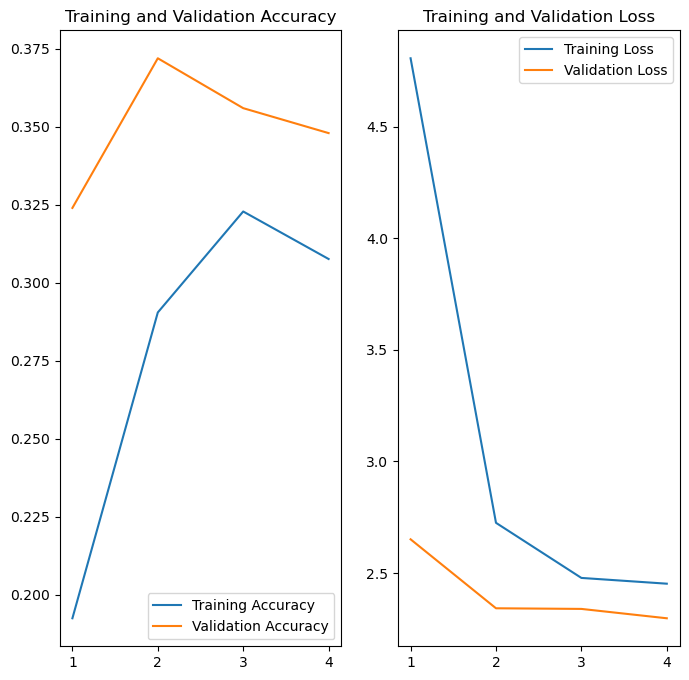

In [8]:
#application de la fonction de tracé
tracer_courbe_suivi("df_score_DL.joblib",1)

In [87]:
# POur repartir des poids des couches de neurones
model.load_weights('model_trained_0.h5')

# voir https://www.tensorflow.org/tutorials/keras/save_and_load?hl=fr